In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

%matplotlib inline

In [2]:
fpath = 'facebook_data_bloombergmarkets_comments_sentiment.tsv'
post_data = pd.read_csv(fpath, sep='\t')
post_data.head()

,ID,PostID,PostDate,CommentID,CommentDate,CommenterURL,CommentText,PositiveScore,NegativeScore,NeutralScore,SentimentScore,TokenQnt,PositiveScoreAvg,NegativeScoreAvg,NeutralScoreAvg,SentimentScoreAvg
0,0,3.863623e+15,2021-05-21 04:02:00,3864171976984432,2021-05-20 00:00:00,shawn.wang.182?fref=nf&rc=p&refid=52&__tn__=R,"Once move, no more fancy financial jobs and do...",0.250,1.250,7.500,-1.000,9,0.027778,0.138889,0.833333,-0.111111
1,1,3.863623e+15,2021-05-21 04:02:00,3867806723287624,2021-05-22 00:00:00,winnie.ngo.984?fref=nf&rc=p&refid=52&__tn__=R,What are you afraid of? Since you do not like ...,1.125,1.875,30.000,-0.750,33,0.034091,0.056818,0.909091,-0.022727
2,2,3.862680e+15,2021-05-20 19:40:00,3863764727025157,2021-05-20 00:00:00,sefanaia.m.kaumaitotoya?fref=nf&rc=p&refid=52...,So now it’s taxable. Why don’t you approve eve...,0.750,0.000,3.250,0.750,4,0.187500,0.000000,0.812500,0.187500
3,3,3.862680e+15,2021-05-20 19:40:00,3862704397131190,2021-05-20 00:00:00,mike.chevalier.90281?fref=nf&rc=p&refid=52&__...,Good! It is becoming a legitimate asset class....,1.750,0.250,3.000,1.500,5,0.350000,0.050000,0.600000,0.300000
4,4,3.862680e+15,2021-05-20 19:40:00,3869349806466649,2021-05-22 00:00:00,jimbopresto?fref=nf&rc=p&refid=52&__tn__=R,Sounds like my kids will have a couple differe...,0.625,0.000,3.375,0.625,4,0.156250,0.000000,0.843750,0.156250


Text(0, 0.5, 'Posts')

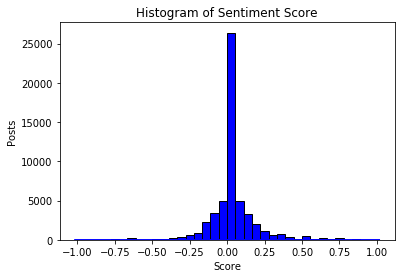

In [3]:
plt.hist(post_data['SentimentScoreAvg'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(post_data['SentimentScoreAvg'], hist=False, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Sentiment Score')
plt.xlabel('Score')
plt.ylabel('Posts')

Text(0, 0.5, 'Posts')

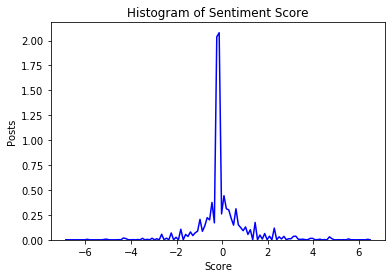

In [4]:


# seaborn histogram
sns.distplot((post_data['SentimentScoreAvg'] - post_data['SentimentScoreAvg'].mean())/post_data['SentimentScoreAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Sentiment Score')
plt.xlabel('Score')
plt.ylabel('Posts')

In [12]:
post_data['SentimentScoreAvg'].describe()

count    53675.000000
mean         0.027316
std          0.152161
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.062500
max          1.000000
Name: SentimentScoreAvg, dtype: float64

In [13]:
post_data['PostDate'] = pd.to_datetime(post_data['PostDate'], errors='coerce')

post_data['DateMonth'] = post_data['PostDate'].dt.strftime('%Y-%m')

In [14]:
post_data['PostDate'].head()

0   2021-05-21 04:02:00
1   2021-05-21 04:02:00
2   2021-05-20 19:40:00
3   2021-05-20 19:40:00
4   2021-05-20 19:40:00
Name: PostDate, dtype: datetime64[ns]

In [15]:
post_data['DateMonth'].head()

0    2021-05
1    2021-05
2    2021-05
3    2021-05
4    2021-05
Name: DateMonth, dtype: object

In [16]:
Monthly_Data = post_data.groupby('DateMonth').agg({'SentimentScore': 'sum','TokenQnt':'sum','PostID':'count'})

In [17]:
Monthly_Data["SentimentScoreAvg"] = Monthly_Data['SentimentScore']/Monthly_Data['TokenQnt']
Monthly_Data.head()

,SentimentScore,TokenQnt,PostID,SentimentScoreAvg
DateMonth,,,,
2011-06,0.000,9,1,0.000000
2011-07,0.500,24,2,0.020833
2011-08,1.250,55,7,0.022727
2011-09,-0.250,19,5,-0.013158
2011-10,1.625,77,10,0.021104


## Download S&P from Yahoo

In [7]:
SnP_monthly = web.get_data_yahoo('BTC-USD','06/01/2014','05/01/2021',interval='m')

In [8]:
SnP_monthly.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-30,411.697998,289.295990,387.427002,338.321014,902994450,338.321014
2014-11-01,457.092987,320.626007,338.649994,378.046997,659733360,378.046997
2014-12-01,384.037994,304.231995,378.248993,320.192993,553102310,320.192993
2015-01-01,320.434998,171.509995,320.434998,217.464005,1098811912,217.464005
2015-02-01,265.610992,212.014999,216.867004,254.263000,711518700,254.263000


In [9]:
SnP_monthly.index = SnP_monthly.index + pd.DateOffset(months=1)
SnP_monthly.index = SnP_monthly.index.strftime('%Y-%m')

In [10]:
SnP_monthly['LogReturn'] = np.log(SnP_monthly['Adj Close']/SnP_monthly['Adj Close'].shift(1))

## Granger test

In [18]:
Granger_data = pd.merge(SnP_monthly,Monthly_Data, how= 'inner', left_index=True, right_index=True)

In [19]:
Granger_data['SS_LogReturn'] = np.log((Granger_data['SentimentScoreAvg']+1)/(Granger_data['SentimentScoreAvg']+1).shift(1))

In [20]:
gc_res = grangercausalitytests(Granger_data[["LogReturn","SS_LogReturn"]].dropna(),3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1681  , p=0.6829  , df_denom=75, df_num=1
ssr based chi2 test:   chi2=0.1749  , p=0.6758  , df=1
likelihood ratio test: chi2=0.1747  , p=0.6760  , df=1
parameter F test:         F=0.1681  , p=0.6829  , df_denom=75, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3854  , p=0.2568  , df_denom=72, df_num=2
ssr based chi2 test:   chi2=2.9631  , p=0.2273  , df=2
likelihood ratio test: chi2=2.9075  , p=0.2337  , df=2
parameter F test:         F=1.3854  , p=0.2568  , df_denom=72, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2541  , p=0.8582  , df_denom=69, df_num=3
ssr based chi2 test:   chi2=0.8396  , p=0.8400  , df=3
likelihood ratio test: chi2=0.8350  , p=0.8411  , df=3
parameter F test:         F=0.2541  , p=0.8582  , df_denom=69, df_num=3


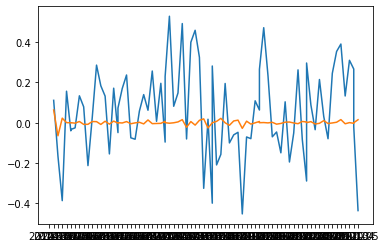

In [21]:
plt.plot(Granger_data["LogReturn"], label = "S&P")
plt.plot(Granger_data["SS_LogReturn"], label = "sentiment")
plt.show()

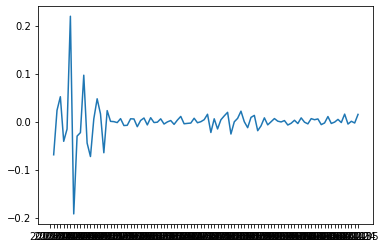

In [112]:
plt.plot(Granger_data["SS_LogReturn"], label = "sentiment")
plt.show()

In [91]:
from statsmodels.tsa import ar_model
from statsmodels.tsa import stattools

In [92]:
def grangerTest(exog, endog):
    MAX_LAG = 30
    ARaic = ar_model.AR(exog.tolist()).fit(maxlag=MAX_LAG, ic="aic")
    ARbic = ar_model.AR(exog.tolist()).fit(maxlag=MAX_LAG, ic="bic")
    # select the fewer number of parameters between both criteria.
    numExog = len(ARaic.params) if len(ARaic.params) < len(ARbic.params) else len(ARbic.params)

    print ("Optimal number of lags for exog data is " + str(numExog))

    ARaic = ar_model.AR(endog.tolist()).fit(maxlag=MAX_LAG, ic="aic")
    ARbic = ar_model.AR(endog.tolist()).fit(maxlag=MAX_LAG, ic="bic")
    # select the fewer number of parameters between both criteria.
    numEndog = len(ARaic.params) if len(ARaic.params) < len(ARbic.params) else len(ARbic.params)

    print ("Optimal number of lags for endog data is " + str(numEndog))

    # now that I know the optimal number of parameters, I can call the
    # granger causality function of statsmodels.
    data = pd.concat([endog, exog], axis=1)
    
    print ("\nGranger causality results of indep onto dep")
    results = stattools.grangercausalitytests(data.dropna(), maxlag=numEndog)

    data = pd.concat([exog, endog], axis=1)
    print ("\nGranger causality results of dep onto indep")
    results = stattools.grangercausalitytests(data.dropna(), maxlag=numExog)
    regr = results[2][1]
    print (regr[0].params)
    print (regr[1].params)
    print (regr[1].pvalues)

In [129]:
grangerTest(Granger_data["SS_LogReturn"].dropna(),Granger_data["LogReturn"].dropna())

C:\Users\Windows\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Optimal number of lags for exog data is 4
Optimal number of lags for endog data is 2

Granger causality results of indep onto dep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1938  , p=0.2779  , df_denom=78, df_num=1
ssr based chi2 test:   chi2=1.2397  , p=0.2655  , df=1
likelihood ratio test: chi2=1.2303  , p=0.2673  , df=1
parameter F test:         F=1.1938  , p=0.2779  , df_denom=78, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8891  , p=0.4153  , df_denom=75, df_num=2
ssr based chi2 test:   chi2=1.8967  , p=0.3874  , df=2
likelihood ratio test: chi2=1.8746  , p=0.3917  , df=2
parameter F test:         F=0.8891  , p=0.4153  , df_denom=75, df_num=2

Granger causality results of dep onto indep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0578  , p=0.8107  , df_denom=78, df_num=1
ssr based chi2 test:   chi2=0.0600  , p=0.8065  , df=1
likelihood ratio test: chi2=0.0600  , p=0.8066  , df